## Machine Failure Prediction

## Data Understanding

In [77]:
## load dataset
import pandas as pd
import re
path = r"https://raw.githubusercontent.com/Vrb77/Datasets/refs/heads/main/classification-train-dataset.csv"
df=pd.read_csv(path)
# Clean column names
df.columns = [re.sub(r'[\s\[\]]+', '_', col).strip('_') for col in df.columns]
df.head()

,id,Product_ID,Type,Air_temperature_K,Process_temperature_K,Rotational_speed_rpm,Torque_Nm,Tool_wear_min,Machine_failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [78]:
df.shape

(136429, 14)

In [79]:
df.columns

Index(['id', 'Product_ID', 'Type', 'Air_temperature_K',
       'Process_temperature_K', 'Rotational_speed_rpm', 'Torque_Nm',
       'Tool_wear_min', 'Machine_failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='str')

In [80]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     136429 non-null  int64  
 1   Product_ID             136429 non-null  str    
 2   Type                   136429 non-null  str    
 3   Air_temperature_K      136429 non-null  float64
 4   Process_temperature_K  136429 non-null  float64
 5   Rotational_speed_rpm   136429 non-null  int64  
 6   Torque_Nm              136429 non-null  float64
 7   Tool_wear_min          136429 non-null  int64  
 8   Machine_failure        136429 non-null  int64  
 9   TWF                    136429 non-null  int64  
 10  HDF                    136429 non-null  int64  
 11  PWF                    136429 non-null  int64  
 12  OSF                    136429 non-null  int64  
 13  RNF                    136429 non-null  int64  
dtypes: float64(3), int64(9), str(2)
memory usage: 1

In [81]:
df['Machine_failure'].value_counts()

Machine_failure
0    134281
1      2148
Name: count, dtype: int64

This dataset has imbalanced data

In [82]:
# check for duplicated rows
df.duplicated().sum()

np.int64(0)

In [83]:
df=df.drop_duplicates()

In [84]:
df.isna().sum()

id                       0
Product_ID               0
Type                     0
Air_temperature_K        0
Process_temperature_K    0
Rotational_speed_rpm     0
Torque_Nm                0
Tool_wear_min            0
Machine_failure          0
TWF                      0
HDF                      0
PWF                      0
OSF                      0
RNF                      0
dtype: int64

As we see above the dataset is imbalanced

Machine failure(1) < Machine Not Failure(0)

In [85]:
# remove insignificant columns in X
X = df.drop(columns=['id','Product_ID','Machine_failure'])
Y = df[['Machine_failure']]

In [86]:
# filtered_df = df[df['Machine failure'] == 1]
# filtered_df 

Clean and preprocess the data before balancing the data

## Data Cleaning and Data Preprocessing

In [88]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

binary_cols = ['TWF','HDF','PWF','OSF','RNF']  # explicitly name it
cat =list(X.select_dtypes(include='str').columns)
con = [c for c in X.select_dtypes(include='number').columns 
       if c not in binary_cols]
print(con)

# # Identify binary columns (only 0 and 1)
# binary = [col for col in con if X[col].dropna().isin([0, 1]).all()]
# con = [col for col in con if col not in binary]  # remove binary from numeric

num_pipe= make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
)

cat_pipe=make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore',sparse_output=False)
)

pre=ColumnTransformer([
    ('cat',cat_pipe,cat),
    ('con',num_pipe,con),
    ('binary', 'passthrough', binary_cols)  # keeps 0/1 as-is
]).set_output(transform='pandas')

X_pre=pre.fit_transform(X)
X_pre.head()

['Air_temperature_K', 'Process_temperature_K', 'Rotational_speed_rpm', 'Torque_Nm', 'Tool_wear_min']


,cat__Type_H,cat__Type_L,cat__Type_M,con__Air_temperature_K,con__Process_temperature_K,con__Rotational_speed_rpm,con__Torque_Nm,con__Tool_wear_min,binary__TWF,binary__HDF,binary__PWF,binary__OSF,binary__RNF
0,0.0,1.0,0.0,0.395880,-0.246230,0.545416,-0.499711,0.556417,0,0,0,0,0
1,0.0,0.0,1.0,1.469856,1.558605,1.720308,-1.323028,1.494433,0,0,0,0,0
2,0.0,1.0,0.0,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,0,0,0,0,0
3,0.0,1.0,0.0,0.610675,0.692284,0.026445,0.464745,1.447532,0,0,0,0,0
4,0.0,0.0,1.0,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,0,0,0,0,0


In [93]:
# filtered_df = X_pre[X_pre['binary__Machine failure'] == 1]
# filtered_df 
Y

,Machine_failure
0,0
1,0
2,0
3,0
4,0
...,...
136424,0
136425,0
136426,0
136427,0


## Separate the data into training and testing

In [94]:

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,Y,train_size=0.66,stratify=Y,random_state=21)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(90043, 13)
(46386, 13)
(90043, 1)
(46386, 1)


## Model Building

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
model1 = LogisticRegression()
model1.fit(xtrain,ytrain)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [96]:
from sklearn.metrics import classification_report
import numpy as np
ypreds_base = model1.predict(xtest)
print(classification_report(ytest,ypreds_base))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45656
           1       0.99      0.77      0.87       730

    accuracy                           1.00     46386
   macro avg       0.99      0.88      0.93     46386
weighted avg       1.00      1.00      1.00     46386



In [97]:
model2 = LogisticRegression(class_weight='balanced') # imbalanced scenario
# class_weight='balanced' will add penalty to the minority classes.
model2.fit(xtrain,ytrain)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :ter

In [98]:

ypreds_balanced = model2.predict(xtest)
print(classification_report(ytest,ypreds_balanced))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     45656
           1       0.42      0.82      0.55       730

    accuracy                           0.98     46386
   macro avg       0.71      0.90      0.77     46386
weighted avg       0.99      0.98      0.98     46386



## Resampling of data

## 1) Oversampling (On minority of data)

In [99]:
ytrain.value_counts()

Machine_failure
0                  88625
1                   1418
Name: count, dtype: int64

In [100]:
from imblearn.over_sampling import ADASYN
ada= ADASYN()
x_sampl2, y_sampl2 =ada.fit_resample(xtrain,ytrain)

In [105]:
x_sampl2

,cat__Type_H,cat__Type_L,cat__Type_M,con__Air_temperature_K,con__Process_temperature_K,con__Rotational_speed_rpm,con__Torque_Nm,con__Tool_wear_min,binary__TWF,binary__HDF,binary__PWF,binary__OSF,binary__RNF
0,0.0,0.0,1.0,0.825470,0.403510,-0.442070,0.229512,-1.382149,0,0,0,0,0
1,0.0,1.0,0.0,0.825470,0.620091,-0.384407,0.264797,-1.303981,0,0,0,0,0
2,0.0,1.0,0.0,-1.644673,-1.473518,-0.730387,0.982259,-0.881874,0,0,0,0,0
3,0.0,0.0,1.0,0.073688,-0.174037,-0.175377,0.535315,0.415715,0,0,0,0,0
4,0.0,0.0,1.0,1.362458,1.342025,0.790485,-0.052768,-0.053293,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
177174,0.0,1.0,0.0,-1.110647,-1.400528,0.365153,-0.500620,1.698359,0,0,0,0,0
177175,0.0,1.0,0.0,-1.152081,-1.239822,0.241522,-0.318388,1.746471,0,0,0,0,0
177176,0.0,1.0,0.0,-0.875959,-1.325224,-0.131876,-0.199940,1.731475,0,0,0,0,0
177177,0.0,1.0,0.0,-1.201514,-1.202900,0.273224,-0.302749,1.764061,0,0,0,0,0


In [106]:
y_sampl2.value_counts()

Machine_failure
0                  88625
1                  88554
Name: count, dtype: int64

In [107]:
model4=LogisticRegression()
model4.fit(x_sampl2,y_sampl2)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [108]:
ypreds_ada =model4.predict(xtest)
print(classification_report(ytest,ypreds_ada))

              precision    recall  f1-score   support

           0       1.00      0.83      0.90     45656
           1       0.08      0.90      0.14       730

    accuracy                           0.83     46386
   macro avg       0.54      0.86      0.52     46386
weighted avg       0.98      0.83      0.89     46386



It indicates overfitting or data leakage — the model is performing suspiciously perfectly, which almost never happens in real world data.

In [109]:
x_sampl2

,cat__Type_H,cat__Type_L,cat__Type_M,con__Air_temperature_K,con__Process_temperature_K,con__Rotational_speed_rpm,con__Torque_Nm,con__Tool_wear_min,binary__TWF,binary__HDF,binary__PWF,binary__OSF,binary__RNF
0,0.0,0.0,1.0,0.825470,0.403510,-0.442070,0.229512,-1.382149,0,0,0,0,0
1,0.0,1.0,0.0,0.825470,0.620091,-0.384407,0.264797,-1.303981,0,0,0,0,0
2,0.0,1.0,0.0,-1.644673,-1.473518,-0.730387,0.982259,-0.881874,0,0,0,0,0
3,0.0,0.0,1.0,0.073688,-0.174037,-0.175377,0.535315,0.415715,0,0,0,0,0
4,0.0,0.0,1.0,1.362458,1.342025,0.790485,-0.052768,-0.053293,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
177174,0.0,1.0,0.0,-1.110647,-1.400528,0.365153,-0.500620,1.698359,0,0,0,0,0
177175,0.0,1.0,0.0,-1.152081,-1.239822,0.241522,-0.318388,1.746471,0,0,0,0,0
177176,0.0,1.0,0.0,-0.875959,-1.325224,-0.131876,-0.199940,1.731475,0,0,0,0,0
177177,0.0,1.0,0.0,-1.201514,-1.202900,0.273224,-0.302749,1.764061,0,0,0,0,0


In [110]:
y_sampl2

,Machine_failure
0,0
1,0
2,0
3,0
4,0
...,...
177174,1
177175,1
177176,1
177177,1


In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')

## Handle Multicollinearity

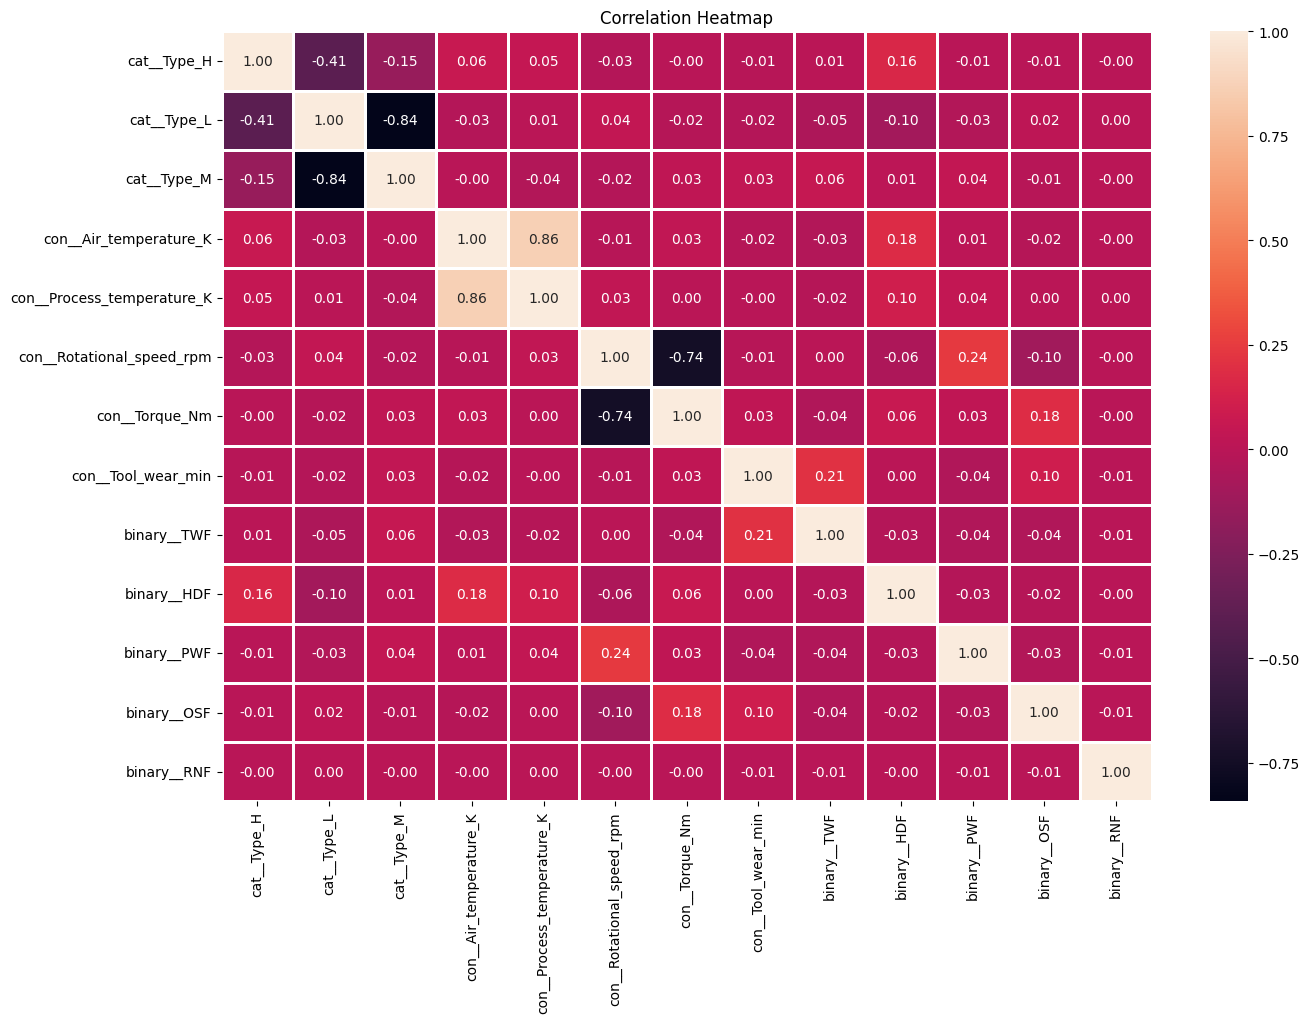

In [112]:

plt.figure(figsize=(15, 10))
sns.heatmap(x_sampl2.corr(), annot=True, fmt='.2f', linewidths=2)
plt.title('Correlation Heatmap')
plt.show()

Strong Positive correlation
1) Process temperature [K] and Air temperature [K]

Strong Negative Correlation
1) Torque[NM] and Rotational speed[rpm]


In [113]:
import numpy as np

# Step 1: Get correlation matrix
corr_matrix = x_sampl2.corr().abs()  # abs() covers negative correlation too

# Step 2: Find highly correlated pairs
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Step 3: Drop columns with correlation > 0.9
to_drop = [col for col in upper.columns if any(upper[col] > 0.8)]
print("Dropping:", to_drop)

# Step 4: Drop them
x_sampl2 = x_sampl2.drop(columns=to_drop)
x_sampl2

Dropping: ['cat__Type_M', 'con__Process_temperature_K']


,cat__Type_H,cat__Type_L,con__Air_temperature_K,con__Rotational_speed_rpm,con__Torque_Nm,con__Tool_wear_min,binary__TWF,binary__HDF,binary__PWF,binary__OSF,binary__RNF
0,0.0,0.0,0.825470,-0.442070,0.229512,-1.382149,0,0,0,0,0
1,0.0,1.0,0.825470,-0.384407,0.264797,-1.303981,0,0,0,0,0
2,0.0,1.0,-1.644673,-0.730387,0.982259,-0.881874,0,0,0,0,0
3,0.0,0.0,0.073688,-0.175377,0.535315,0.415715,0,0,0,0,0
4,0.0,0.0,1.362458,0.790485,-0.052768,-0.053293,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
177174,0.0,1.0,-1.110647,0.365153,-0.500620,1.698359,0,0,0,0,0
177175,0.0,1.0,-1.152081,0.241522,-0.318388,1.746471,0,0,0,0,0
177176,0.0,1.0,-0.875959,-0.131876,-0.199940,1.731475,0,0,0,0,0
177177,0.0,1.0,-1.201514,0.273224,-0.302749,1.764061,0,0,0,0,0


## Model Evaluation

In [116]:
ypreds_ada =model4.predict(xtest)
print(classification_report(ytest,ypreds_ada))

              precision    recall  f1-score   support

           0       1.00      0.83      0.90     45656
           1       0.08      0.90      0.14       730

    accuracy                           0.83     46386
   macro avg       0.54      0.86      0.52     46386
weighted avg       0.98      0.83      0.89     46386



In [117]:
model2.score(xtrain,ytrain)

0.9792321446420044

In [118]:
model2.score(xtest,ytest)

0.9791531927736817

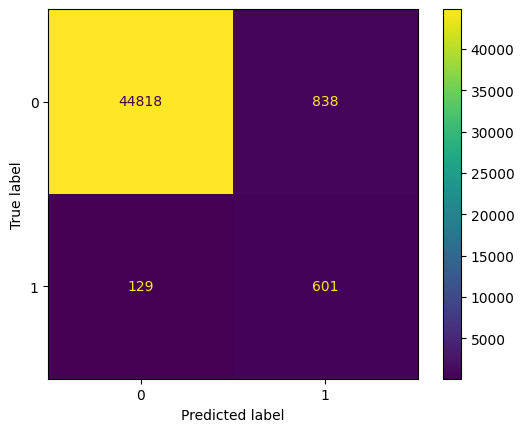

In [119]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
ConfusionMatrixDisplay.from_estimator(model2,xtest,ytest)

In [120]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

ypreds_tr = model2.predict(xtrain)
ypreds_te = model2.predict(xtest)

mse_tr = mean_squared_error(ytrain,ypreds_tr)
mae_tr = mean_absolute_error(ytrain,ypreds_tr)
rmse_tr = mse_tr**(1/2)
r2_tr = r2_score(ytrain,ypreds_tr)

print("==========================")
print("Training Scores")
print(f"MSE:{mse_tr}")
print(f"RMSE:{rmse_tr}")
print(f"MAE:{mae_tr}")
print(f"R2:{r2_tr}")


mse_te = mean_squared_error(ytest,ypreds_te)
mae_te = mean_absolute_error(ytest,ypreds_te)
rmse_te = mse_te**(1/2)
r2_te = r2_score(ytest,ypreds_te)

print("==========================")
print("Testing Scores")
print(f"MSE:{mse_te}")
print(f"RMSE:{rmse_te}")
print(f"MAE:{mae_te}")
print(f"R2:{r2_te}")

Training Scores
MSE:0.020767855357995624
RMSE:0.14411056643423348
MAE:0.020767855357995624
R2:-0.33985895627644513
Testing Scores
MSE:0.020846807226318285
RMSE:0.14438423468758035
MAE:0.020846807226318285
R2:-0.3458376639118992


In [ ]:
# pip install joblib
import joblib

# save the pipeline - data cleaning and data preprocessing
joblib.dump(pre,'pre.joblib')

# save the model (best ridge)
joblib.dump(model2,'machine_failure_model.joblib')

['machine_failure_model.joblib']

In [ ]:
model2_load = joblib.load('machine_failure_model.joblib')
pre_load = joblib.load('pre.joblib')

## Check on unseen data

In [ ]:
path2 = r'https://raw.githubusercontent.com/Vrb77/Datasets/refs/heads/main/classification-test-out%20of%20sample%20predictions.csv'
xnew = pd.read_csv(path2)
xnew

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90949,227378,L51130,L,302.3,311.4,1484,40.4,15,0,0,0,0,0
90950,227379,L47783,L,297.9,309.8,1542,33.8,31,0,0,0,0,0
90951,227380,L48097,L,295.6,306.2,1501,41.4,187,0,0,0,0,0
90952,227381,L48969,L,298.1,307.8,1534,40.3,69,0,0,0,0,0


In [ ]:
xnew.isna().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [ ]:
xnew.columns

Index(['id', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='str')

In [ ]:
x_sampl2.columns

Index(['cat__Type_H', 'cat__Type_L', 'con__Air_temperature_K',
       'con__Rotational_speed_rpm', 'con__Torque_Nm', 'con__Tool_wear_min',
       'binary__Machine_failure', 'binary__TWF', 'binary__HDF', 'binary__PWF',
       'binary__OSF', 'binary__RNF', 'Type'],
      dtype='str')

In [ ]:
x_sampl2.head()

,cat__Type_H,cat__Type_L,con__Air_temperature_K,con__Rotational_speed_rpm,con__Torque_Nm,con__Tool_wear_min,binary__Machine_failure,binary__TWF,binary__HDF,binary__PWF,binary__OSF,binary__RNF,Type
0,0.0,0.0,0.825470,-0.442070,0.229512,-1.382149,0,0,0,0,0,0,H
1,0.0,1.0,0.825470,-0.384407,0.264797,-1.303981,0,0,0,0,0,0,L
2,0.0,1.0,-1.644673,-0.730387,0.982259,-0.881874,0,0,0,0,0,0,L
3,0.0,0.0,0.073688,-0.175377,0.535315,0.415715,0,0,0,0,0,0,H
4,0.0,0.0,1.362458,0.790485,-0.052768,-0.053293,0,0,0,0,0,0,H


In [ ]:
# Add dummy Machine_failure column (test data won't have target column)
xnew['Machine_failure'] = 1
# First prepare the data ready for the model
xnew.columns = [re.sub(r'[\s\[\]]+', '_', col).strip('_') for col in xnew.columns]
xnew_pre = pre_load.transform(xnew)
xnew_pre

,cat__Type_H,cat__Type_L,cat__Type_M,con__Air_temperature_K,con__Process_temperature_K,con__Rotational_speed_rpm,con__Torque_Nm,con__Tool_wear_min,binary__Machine_failure,binary__TWF,binary__HDF,binary__PWF,binary__OSF,binary__RNF
0,0.0,1.0,0.0,1.308759,1.125444,-0.153753,-0.276240,-0.694271,1,0,0,0,0,0
1,0.0,1.0,0.0,0.986567,0.764477,1.388744,-1.358313,-1.366516,1,0,0,0,0,0
2,0.0,1.0,0.0,0.771772,0.331317,0.033653,-0.311525,-0.131461,1,0,0,0,0,0
3,0.0,0.0,1.0,0.127386,-0.246230,-0.297912,0.852880,-1.554119,1,0,0,0,0,0
4,0.0,0.0,1.0,1.899446,1.702992,-0.038426,0.111895,0.149943,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90949,0.0,1.0,0.0,1.308759,1.053251,-0.261872,0.006040,-1.397783,1,0,0,0,0,0
90950,0.0,1.0,0.0,-1.053986,-0.101844,0.156188,-0.770229,-1.147645,1,0,0,0,0,0
90951,0.0,1.0,0.0,-2.289058,-2.700806,-0.139337,0.123657,1.291196,1,0,0,0,0,0
90952,0.0,1.0,0.0,-0.946589,-1.545712,0.098524,-0.005721,-0.553568,1,0,0,0,0,0


In [ ]:
preds = model2.predict(xnew_pre)
preds.sort()
preds

array([1, 1, 1, ..., 1, 1, 1], shape=(90954,))

In [ ]:

xnew['Machine_failure'] = preds
xnew

,id,Product_ID,Type,Air_temperature_K,Process_temperature_K,Rotational_speed_rpm,Torque_Nm,Tool_wear_min,TWF,HDF,PWF,OSF,RNF,Machine_failure
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90949,227378,L51130,L,302.3,311.4,1484,40.4,15,0,0,0,0,0,0
90950,227379,L47783,L,297.9,309.8,1542,33.8,31,0,0,0,0,0,0
90951,227380,L48097,L,295.6,306.2,1501,41.4,187,0,0,0,0,0,0
90952,227381,L48969,L,298.1,307.8,1534,40.3,69,0,0,0,0,0,0


In [ ]:
# Save the results to csv file
xnew.to_csv('Machine_failure_predictions.csv',index=False)

## Ridge Regularization

In [ ]:
# from sklearn.linear_model import LinearRegression,Ridge,Lasso
# ridge_model = Ridge(alpha=0.01)
# ridge_model.fit(xtrain,ytrain)

In [ ]:
# ridge_model.score(xtrain,ytrain)

In [ ]:
# ridge_model.score(xtest,ytest)